In [1]:
""""
    Some of the interesting questions (tasks) which can be performed on this dataset 

    -Understanding what content is available in different countries
    -Identifying similar content by matching text-based features
    -Network analysis of Actors / Directors and find interesting insights
    -Is Netflix has increasingly focusing on TV rather than movies in recent years
    
    """


'"Some of the interesting questions (tasks) which can be performed on this dataset -\n\n    Understanding what content is available in different countries\n    Identifying similar content by matching text-based features\n    Network analysis of Actors / Directors and find interesting insights\n    Is Netflix has increasingly focusing on TV rather than movies in recent years'

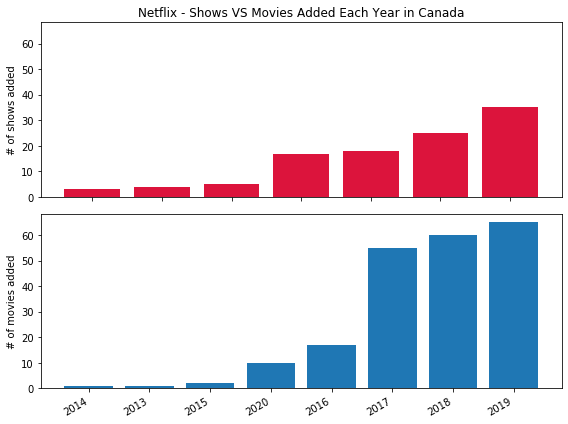

In [163]:
#Understanding what content is available in different countries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import dates as mpl_dates

df = pd.read_csv('netflix_titles.csv')
df_international = df[:]

#Let's create a new dataframe analyzing the Canadian movies
filt = df['country'].str.contains('Canada',na = False) #filter down to canadian movies
df = df.loc[filt] # clean up our original dataframe

#let's see the rise of television that is being added to netflix vs movies over the years

#first we will create a new column just with the year of the date_added called year_added
df['year_added'] = df['date_added'].str[-4:]

df_tv = df[(df['type'] == 'TV Show')]
df_movie = df[(df['type']  == 'Movie')]

tv_count = df_tv['year_added'].value_counts()
movie_count = df_movie['year_added'].value_counts()

tv_count = tv_count.reset_index()
movie_count = movie_count.reset_index()

x_tv = list(tv_count['index'])
y_tv = list(tv_count['year_added'])

x_movie = list(movie_count['index'])
y_movie = list(movie_count['year_added'])

x_tv.reverse()
y_tv.reverse()

x_movie.reverse()
y_movie.reverse()

fig, (ax1,ax2) = plt.subplots(nrows = 2, ncols=1,figsize = (8,6), sharey=True)

ax1.bar(x_tv,y_tv,color='crimson')
ax2.bar(x_movie,y_movie)

ax1.set_title('Netflix - Shows VS Movies Added Each Year in Canada')
ax1.set_ylabel('# of shows added')
ax2.set_ylabel('# of movies added')

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

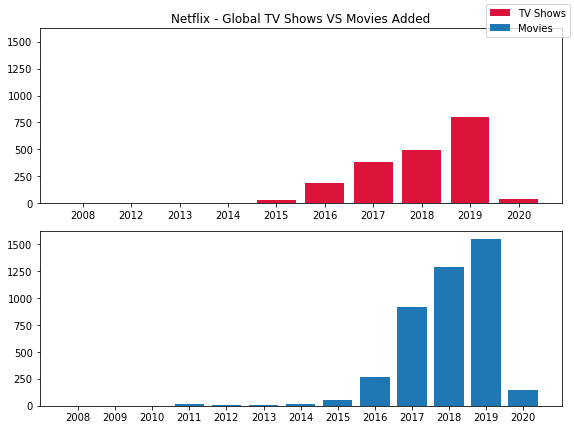

In [171]:
#Understanding what content is available in different countries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import dates as mpl_dates

df = pd.read_csv('netflix_titles.csv')
df['year_added'] = df['date_added'].str[-4:]

df_tv = df[df['type'] == 'TV Show']
df_movie = df[df['type'] == 'Movie']

tv_count = df_tv['year_added'].value_counts()
tv_count = tv_count.reset_index()
tv_count = tv_count.rename(columns={'index':'year','year_added':'count'}) 
tv_count = tv_count.sort_values(by = ['year'])

#rename the columns so it makes more sense

movie_count = df_movie['year_added'].value_counts()
movie_count = movie_count.reset_index()
movie_count = movie_count.rename(columns={'index':'year','year_added':'count'}) 
movie_count = movie_count.sort_values(by = ['year'])

fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,sharey=True,figsize = (8,6))

ax1.bar(tv_count['year'],tv_count['count'],label = 'TV Shows',color='crimson')
ax2.bar(movie_count['year'],movie_count['count'],label = 'Movies')

ax1.set_title('Netflix - Global TV Shows VS Movies Added')
fig.legend()
plt.tight_layout()
plt.show()


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('netflix_titles.csv')

#Let's see how many movies Leo dicaprio is in currently on netflix globally

leo = df['cast'].str.contains('DiCaprio',na = False) 
df.loc[leo]

miyazaki = df['director'].str.contains('Hayao Miyazaki',na = False)
tarantino = df['director'].str.contains('Tarantino',na = False)

df.loc[leo]
df.loc[tarantino,['title','type']]

,title,type
544,The Hateful Eight,Movie
2883,Inglourious Basterds,Movie
3530,Kill Bill: Vol. 1,Movie
3531,Kill Bill: Vol. 2,Movie
3628,Pulp Fiction,Movie
5063,Jackie Brown,Movie
5303,The Hateful Eight: Extended Version,TV Show


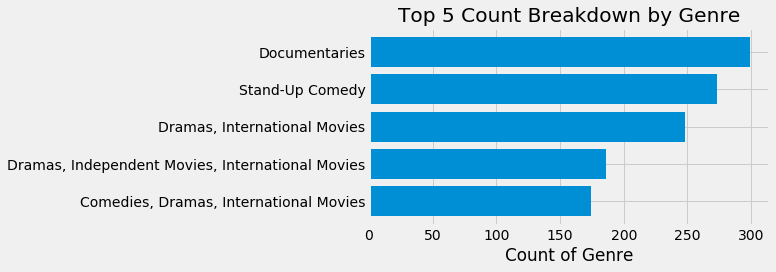

In [283]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('netflix_titles.csv')

genre = df['listed_in'].value_counts()
genre = genre.reset_index()
genre = genre.head(5)
genre = genre.rename(columns={'index':'genre','listed_in':'count'}) 
genre.sort_values(by = ['count'],inplace=True)

genre_type = genre['genre']
values = genre['count']

fig,ax = plt.subplots(figsize = (11,4))

ax.barh(genre_type,values)
ax.set_title('Top 5 Count Breakdown by Genre')
ax.set_xlabel('Count of Genre')

plt.tight_layout()
plt.show()

In [6]:
#Let's use numpy to check out my data

import pandas as pd
import numpy as np

df = pd.read_csv('netflix_titles.csv')

year = np.array(df['release_year'])
type = np.array(df['type'])
listed_in = np.array(df['listed_in'])

median = np.median(year) #gets the median
mean = np.mean(year) #get the mean

year_filt = year[year > 2017] #you can use two arrays to filter this is fucking bonkers
another_filt = year[type == 'Movie'] # nice nice nice

comedies_duration = np.array(df['duration'])
comedies_duration = comedies_duration[listed_in == 'Comedies']

test = np.array(df[['type','duration']])
tester = test[:,1] # get just the second column of my 2d data array called test
lst_array = np.array([int(item[0:2]) for item in tester]) #transforms my list into an array

lst_mean = np.mean(lst_array)